1)_

  

> ii. Usando 3 subplots, graficar en Python

*   Las soluciones exactas y aproximadas 
*   El error global
*   El error local


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Solucion exacta de la funcion a)
def y(t):
  return t*np.log(t) +2*t

def y_prima(t):
  return 1+(y/t)



[2.0, 3.6081976621622465, 5.386294361119891]




> iii. Implementar todos los métodos del apartado i) en Python. Evalué ambos PVI con valores de h de 10-2, 10-3 y 10-4.

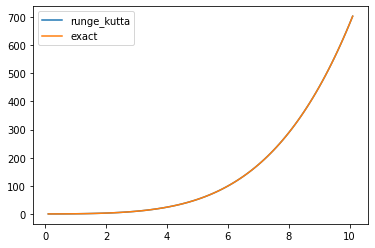

max error 0.00005


In [ ]:
#METODO DE RUNGE-KUTTA

import math
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta(y, x, dx, f):
    """ y es el valor inicial para y
        x es el valor inicial para x
        dx es el paso de tiempo de x
        f es la derivada de la funcion y(t)
    """
    k1 = dx * f(y, t)
    k2 = dx * f(y + 0.5 * k1, x + 0.5 * dx)
    k3 = dx * f(y + 0.5 * k2, x + 0.5 * dx)
    k4 = dx * f(y + k3, x + dx)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6.


def func(y, t): return t * math.sqrt(y)


t = 0.
y = 1.
dt = .1
ys, ts = [], []
    
while t <= 10:
  y = runge_kutta(y, t, dt, func)
  t += dt
  ys.append(y)
  ts.append(t)


#Realizo las graficas
exact = [(t ** 2 + 4) ** 2 / 16. for t in ts]
plt.plot(ts, ys, label='runge_kutta')
plt.plot(ts, exact, label='exact')
plt.legend()
plt.show()
error = np.array(exact) - np.array(ys)
print("max error {:.5f}".format(max(error)))

estimado[xi,yi]
[[1.         2.        ]
 [1.01       2.0300495 ]
 [1.02       2.06019802]
 [1.03       2.09044459]
 [1.04       2.12078824]
 [1.05       2.15122806]]
Error máximo estimado:  1.6150858082042419e-06
entre puntos: 
[0.00000000e+00 3.29211205e-07 6.55234750e-07 9.78163026e-07
 1.29808488e-06 1.61508581e-06]


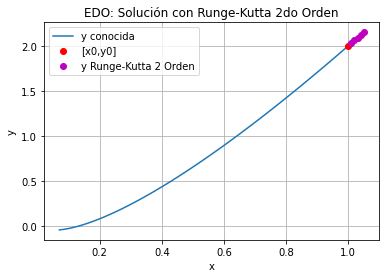

In [ ]:
#METODO DE RUNGE-KUTTA 2

import numpy as np

import matplotlib.pyplot as plt

def rungekutta2(d1y,x0,y0,h,muestras):
    tamano   = muestras + 1
    estimado = np.zeros(shape=(tamano,2),dtype=float)
    # incluye el punto [x0,y0]
    estimado[0] = [x0,y0]
    xi = x0
    yi = y0
    for i in range(1,tamano,1):
        K1 = h * y_prima(xi,yi)
        K2 = h * y_prima(xi+h, yi + K1)

        yi = yi + (K1+K2)/2
        xi = xi + h
        
        estimado[i] = [xi,yi]
    return(estimado)

#Solucion exacta de la funcion a)
def y(t):
  return t*np.log(t) +2*t

def y_prima(t,y):
  return 1+(y/t)

# INGRESO
x0 = 1
y0 = 2
h  = 10**(-2)
muestras = 5

# PROCEDIMIENTO
puntosRK2 = rungekutta2(y_prima(x0,y0),x0,y0,h,muestras)
xi = puntosRK2[:,0]
yiRK2 = puntosRK2[:,1]

# SALIDA
print('estimado[xi,yi]')
print(puntosRK2)


# ERROR vs solución conocida
"""
y_sol = lambda x: ((np.e)**x) + x + x**2
"""
yi_psol  = y(xi) #Solucion conocida
errores  = yi_psol - yiRK2 #Error Global
errormax = np.max(np.abs(errores)) #Error Maximo

print('Error máximo estimado: ',errormax)
print('entre puntos: ')
print(errores)
# SALIDA
"""
print('Error máximo estimado: ',errormax)
print('entre puntos: ')
print(errores)
"""
# GRAFICA [a,b+2*h]
a = x0
b = h*muestras+2*h
muestreo = 10*muestras+2
xis = np.linspace(a,b,muestreo)
yis = y(xis)


# Gráfica
plt.plot(xis,yis, label='y conocida')
plt.plot(xi[0],yiRK2[0],'o',color='r', label ='[x0,y0]')
plt.plot(xi[1:],yiRK2[1:],'o',color='m',label ='y Runge-Kutta 2 Orden')

plt.title('EDO: Solución con Runge-Kutta 2do Orden')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

estimado[xi,yi]
[[ 0.         -1.        ]
 [ 0.01       -0.9412807 ]
 [ 0.02       -0.88493259]
 [ 0.03       -0.83084051]
 [ 0.04       -0.77889483]
 [ 0.05       -0.72899126]]
Error máximo estimado:  1.0
entre puntos: 
[1.         0.9317684  0.86683584 0.80501927 0.7461456  0.69005122]


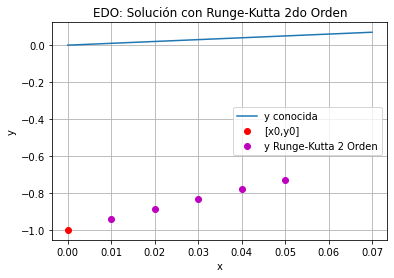

In [ ]:
#Solucion exacta de la funcion b)
def y(t):
  return t*-np.exp(-5*t)

def y_prima(t,y):
  return 5*np.exp(5*t)*(y-t)**(2)+1

# INGRESO
x0 = 0
y0 = -1
h  = 10**(-2)
muestras = 5

# PROCEDIMIENTO
puntosRK2 = rungekutta2(y_prima(x0,y0),x0,y0,h,muestras)
xi = puntosRK2[:,0]
yiRK2 = puntosRK2[:,1]

# SALIDA
print('estimado[xi,yi]')
print(puntosRK2)


# ERROR vs solución conocida

yi_psol  = y(xi) #Solucion conocida
errores  = yi_psol - yiRK2 #Error Global
errormax = np.max(np.abs(errores)) #Error Maximo

print('Error máximo estimado: ',errormax)
print('entre puntos: ')
print(errores)
# SALIDA

# GRAFICA [a,b+2*h]
a = x0
b = h*muestras+2*h
muestreo = 10*muestras+2
xis = np.linspace(a,b,muestreo)
yis = (xis)

# Gráfica
#plt.subplot()
plt.plot(xis,yis, label='y conocida')
plt.plot(xi[0],yiRK2[0],'o',color='r', label ='[x0,y0]')
plt.plot(xi[1:],yiRK2[1:],'o',color='m',label ='y Runge-Kutta 2 Orden')

plt.title('EDO: Solución con Runge-Kutta 2do Orden')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


2.   Investigue sobre los métodos para resolver ecuaciones diferenciales ordinarias implementados en la librería **scipy.interpolate** de Python, y explique en que se basan cada uno de estos algoritmos. Elija y justifique cual método es el apropiado para resolver los siguientes problemas de valor inicial: 






> *Rta: Esta libreria contiene funciones para poder resolver Ecuaciones diferenciales en forma numérica con Python, particularmente los dos solucionadores de ecuaciones diferenciales ordinarias, **integrate.odeint** y **integrate.ode**. La principal diferencia entre ambos, es que integrate.ode es más flexible, ya que nos ofrece la posibilidad de elegir entre distintos solucionadores. *





